# <strong> Using age, blood pressure, cholestrol level, and heart rate to classify heart disease patients in Cleveland. </strong>


### Group 04 - Arshia Singla, Naufal Prasojo, Henry Shi, William Chen


Heart disease, also known as cardiovascular disease, is a broad term encompassing a variety of conditions affecting the heart (such as heart failure and pulmonary heart disease) and blood vessels (such as coronary artery disease and aortic aneurysm). 

It remains a leading cause of morbidity and mortality worldwide, accounting for a significant proportion of deaths each year. Understanding heart disease and its risk factors is essential due to its widespread prevalence and profound impact on public health. 

By exploring and analysing the dataset, we can identify patterns, trends, and correlations, which can inform evidence-based practices, and policies aimed at reducing the global issue of heart disease and improving patient outcomes. Furthermore, investigating the heart disease datasets can facilitate the development of predictive models, risk assessment tools, and personalized healthcare approaches. Overall, this exploration is crucial for enhancing our understanding of this complex condition and implementing effective strategies to prevent, diagnose, and manage it. 

The goal of this project is to use the risk factors of heart disease to classify patients based on the possibility to have a heart disease.

The question that we will be trying to answer is: <strong> Is a new patient likely to have a heart disease based on their age, blood pressure, cholestrol level, and maximum heart rate? </strong>

## Dataset Description

We will be using the Heart Disease dataset from the Cleveland database. It is a multivariate dataset. 
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  
   
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

### Preliminary exploratory data analysis

In [1]:
# importing libraries
 
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
set.seed(1)

# reading the data, assigning column names and character types
cleveland_data <- read_csv("data/processed.cleveland.csv",
                           col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", 
                                        "exang", "oldpeak", "slope", "ca", "thal", "num"),
                           col_types = list("d", "d", "d", "d", "d", "d", "d", "d", "d", "d", "d", "f" , "f", "d"))

# cleaning (tidying) and wrangling data
cleveland_data[ cleveland_data == "?" ] <- NA

cleveland_tidy <- cleveland_data |>
                   mutate(diagno = ifelse(is.na(num), NA, (num > 0))) |>
                   mutate(sex = as_factor(sex), cp = as_factor(cp),
                         fbs = as_factor(fbs), restecg = as_factor(restecg),
                         exang = as_factor(exang), thal = as_factor(thal), 
                         ca = as_factor(ca), slope = as_factor(slope))

# splitting the dataframe into testing and training datasets
cleveland_split <- initial_split(cleveland_tidy, prop = 0.75, strata = num)

cleveland_training <- training(cleveland_split)
cleveland_testing <- testing(cleveland_split)

head(cleveland_training)



age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diagno
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<lgl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,FALSE
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,FALSE
56,0,2,140,294,0,2,153,0,1.3,2,0.0,3.0,0,FALSE
57,1,3,150,168,0,0,174,0,1.6,1,0.0,3.0,0,FALSE
49,1,2,130,266,0,0,171,0,0.6,1,0.0,3.0,0,FALSE
64,1,1,110,211,0,2,144,1,1.8,2,0.0,3.0,0,FALSE


In [3]:
# summarizing to get minimum, maximum, and mean of each predictor variable + total number of rows per class
cleveland_summary <- cleveland_training |>
                     group_by(diagno) |> 
                     summarize(min_age = min(age), max_age = max(age), mean_age = mean(age), 
                               min_chol = min(chol), max_chol = max(chol), mean_chol = mean(chol),
                               min_trestbps = min(trestbps), max_trestbps = max(trestbps), mean_trestbps = mean(trestbps),
                               min_thalach = min(thalach), max_thalach = max(thalach), mean_thalach = mean(thalach),
                               no_of_patients = n())

cleveland_summary

diagno,min_age,max_age,mean_age,min_chol,max_chol,mean_chol,min_trestbps,max_trestbps,mean_trestbps,min_thalach,max_thalach,mean_thalach,no_of_patients
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
FALSE,29,76,52.68548,126,564,244.2903,94,180,129.7339,105,202,158.9194,124
TRUE,35,77,56.48039,131,409,249.3627,100,192,133.9020,71,195,138.4118,102


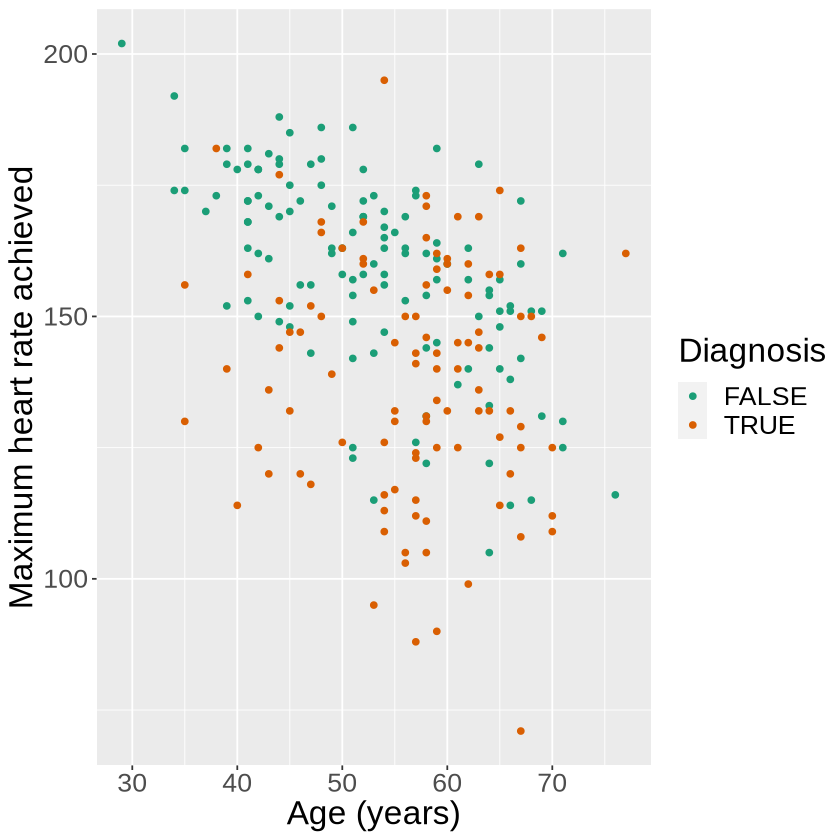

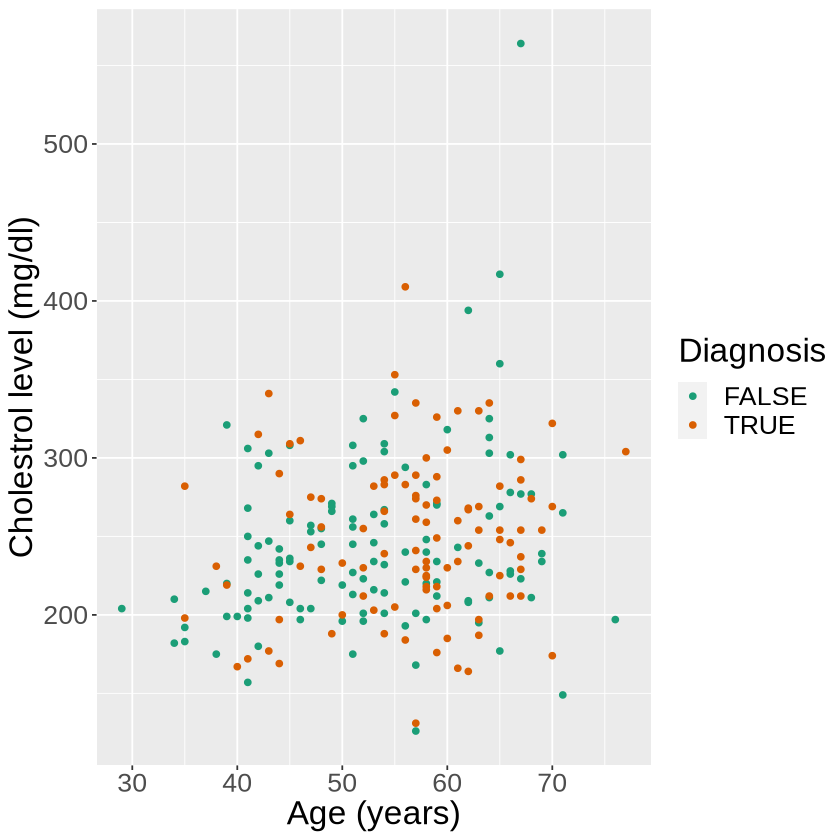

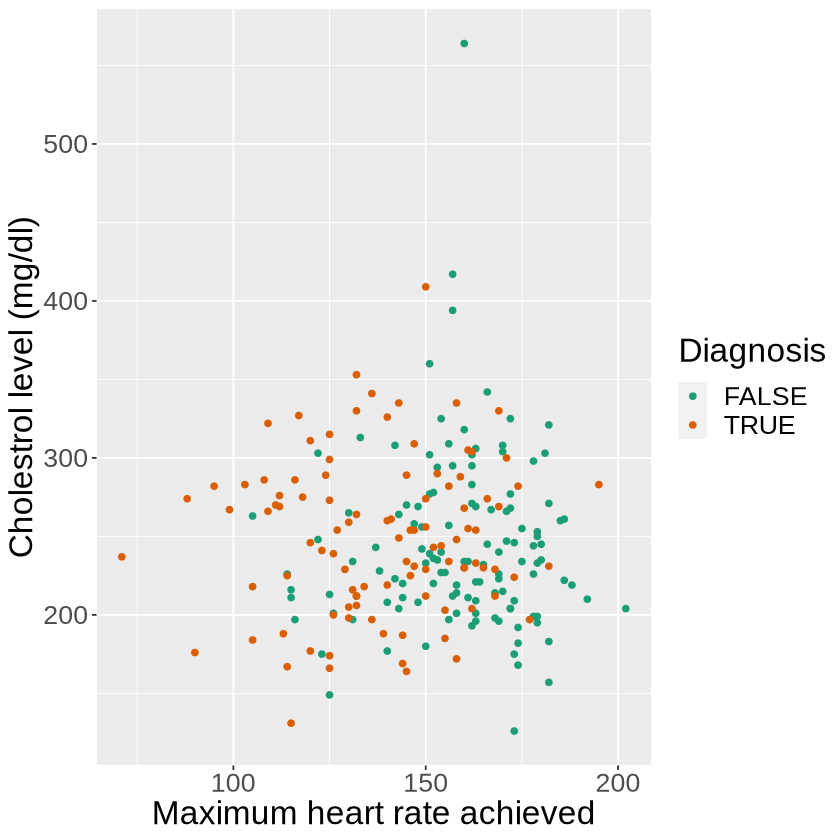

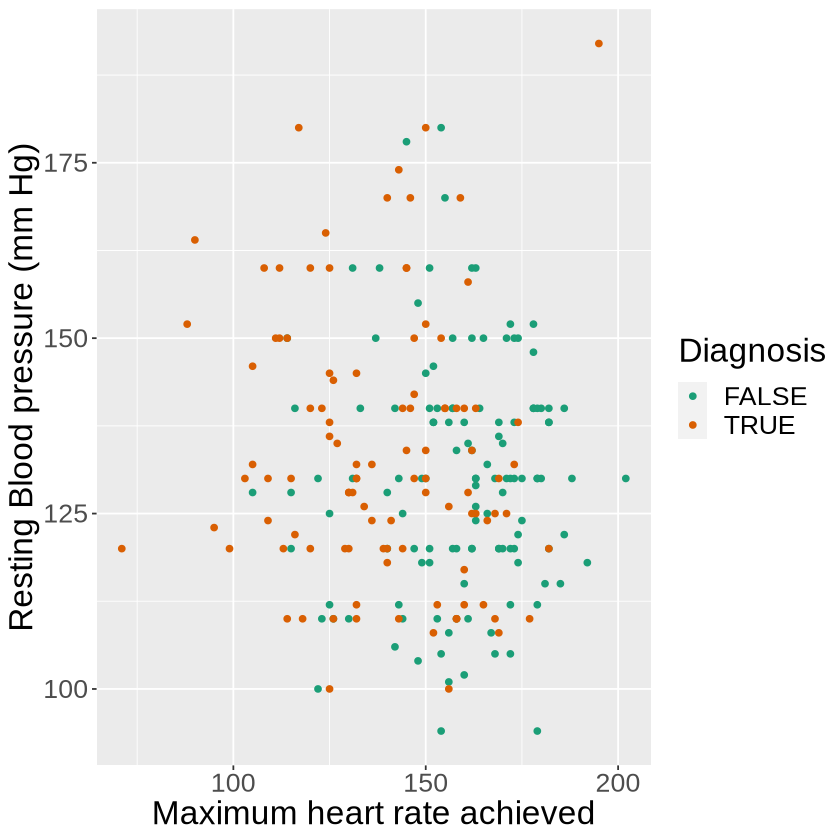

In [4]:
# plotting the training data (cleveland_training)
options(repr.plot.height = 7, repr.plot.width = 7)

plot1 <- cleveland_training |>
          ggplot(aes(x = age, y = thalach, color = diagno)) + 
                  geom_point() +
                  labs(x = "Age (years)", y = "Maximum heart rate achieved", color = "Diagnosis") + 
                  theme(text = element_text(size = 20)) +
                  scale_color_brewer(palette = "Dark2")

plot2 <- cleveland_training |>
          ggplot(aes(x = age, y = chol, color = diagno)) + 
                  geom_point() +
                  labs(x = "Age (years)",
                       y = "Cholestrol level (mg/dl)", color = "Diagnosis") + 
                  theme(text = element_text(size = 20)) +
                  scale_color_brewer(palette = "Dark2")

plot3 <- cleveland_training |>
          ggplot(aes(x = thalach, y = chol, color = diagno)) + 
                  geom_point() +
                  labs(x = "Maximum heart rate achieved",
                       y = "Cholestrol level (mg/dl)", color = "Diagnosis") + 
                  theme(text = element_text(size = 20)) +
                  scale_color_brewer(palette = "Dark2")

plot4 <- cleveland_training |>
          ggplot(aes(x = thalach, y = trestbps, color = diagno)) + 
                  geom_point() +
                  labs(x = "Maximum heart rate achieved",
                       y = "Resting Blood pressure (mm Hg)", color = "Diagnosis") + 
                  theme(text = element_text(size = 20)) +
                  scale_color_brewer(palette = "Dark2")

plot1
plot2
plot3
plot4

### Methods

We are using data from the file processed.cleveland.data from the heart disease database to predict the likeliness of a patient from Cleveland having heart disease. The columns that we are using are as follows:

1.  <strong> age: </strong> age in years
2.  <strong> sex: </strong> sex (1 = male; 0 = female)
3.  <strong> cp: </strong> chest pain type
    - Value 1: typical angina;
    - Value 2: atypical angina;
    - Value 3: non-anginal pain;
    - Value 4: asymptomatic)
4.  <strong> trestbps: </strong> resting blood pressure (in mm Hg on admission to the hospital)
5.  <strong> chol: </strong> serum cholestrol in mg/dl
6.  <strong> fbs: </strong> (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7.  <strong> restecg: </strong> resting electrocardiographic results 
    - Value 0: normal;
    - Value 1: having ST-T wave abnormality;
    - Value 2: showing probable or definite                                                                                    left ventricular hypertrophy                                                                                    by Estes' criteria
8.  <strong> thalach: </strong> maximum heart rate achieved
9.  <strong> exang: </strong> exercise induced angina (1 = yes; 0 = no)
10. <strong> oldpeak: </strong> ST depression induced by exercise relative to rest 
11. <strong> slope: </strong> the slope of the peak exercise ST segment
    - Value 1: upsloping;
    - Value 2: flat;
    - Value 3: downsloping
12. <strong> ca: </strong> number of major vessels (0 - 3) colored by fluoroscopy
13. <strong> thal: </strong> 3 = normal; 6 = fixed defect; 7 = reversible defect
14. <strong> num: </strong> diagnosis of heart disease (1,2,3,4 = presence, 0 = no presence)


Each column in the dataset has numeric values and it has 303 rows. The missing data is represented with the string "?".

To clean (or tidy) the data, we changed all the "?" values to NA. Since, the <strong> num </strong> column uses integers to indicate the presence (1,2,3,4) or absence (0) of the heart disease in a patient, and we want to determine whether or not a patient has heart disease, we added a new boolean column <strong> diagno </strong> to represent the diagnosis as TRUE or FALSE. 

We then used the initial_split() function to split our tidied dataframe into 75% training data and 25% testing data while stratifying for <strong> diagno</strong>. However, for analysis, we only used the training set. 

We chose 4 predictor variables based on the risk factors of heart disease which are:

- There are many risk factors for heart diseases, with <strong> age </strong>being the most important one (Francis DP et al., 2013).

- High levels of LDL ("bad") <strong>cholestrol</strong> can accumulate in the walls of arteries, forming plaque which narrows the arteries and restricts blood flow to the heart muscle. This increases the risk of heart attack, and coronary artery disease. 

- Abnormalities in <strong>heart rate</strong> can indicate underlying cardiovascular issues and risks for individuals with heart disease. 

- <strong>High blood pressure</strong> (or hypertension), increases the risk of heart disease by damaging arteries, leading to stroke, aneurysms, etc. 

To summarize our data, we grouped the rows by <strong> diagno </strong> and then summarized each of the columns by doing minimum, maximum, and mean for each of our predictor variables <strong> age </strong>, <strong> chol </strong>, <strong> trestbps </strong>, and <strong> thalach </strong>. 

From this summarization, we noticed:

- mean age, the mean cholestrol levels, and the mean resting blood pressure of the patients suffering with heart disease are higher.
- on an average, the maximum heart rate achieved is lower for the patients with heart disease.

To visualize these relationships, we generated some scatterplots of these variables against each other. This process helped us identify that the predictors we decided to use were indeed a good choice. When we plotted  <strong> thalach </strong> v/s  <strong> age </strong>, and coloured the points based on  <strong> diagno </strong>, we could see the clear distinction between the regions of TRUE diagnoses, FALSE diagnoses, and the regions where the points are overlapping. Similarly, we could see the distinct distributions when we plotted <strong> chol </strong> v/s <strong> age </strong>, <strong> chol </strong> v/s <strong> thalach </strong>, and <strong> trestbps </strong> v/s <strong> thalach </strong>.

### Expected outcomes and significance

Based on the data analysization above, we expect to find that a patient with heart disease would be older and have high cholestrol levels, high blood pressure and low maximum heart rate. Further, we expect to find more intricate relationships between these risk factors causing heart disease.

If a classification model was devised to make predictions and report a patient with heart disease, that would make it easier for the doctors to diagnose patients and the whole process would be a lot more efficient. Moreover, the patients would be able to get treated in the earlier stages of heart disease, increasing the possiblity of healing quickly and completely. 

Some future questions this could lead to are as follows: 

- What are the two primary risk factors that are most strongly associated with causing heart disease?
- How can one mitigate the impact of a specific risk factor through preventive measures?

### Bibliography

Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.

Wikimedia Foundation. (2024a, February 15). Cardiovascular disease. Wikipedia. https://en.wikipedia.org/wiki/Cardiovascular_disease 